In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
df = pd.read_csv('roas_campaign.csv')
# df = df.fillna(0)
df.head()

,campaign_id,campaign_start,campaign_end,days_active,spend,impressions,clicks,ctr,n_leads,inbounded_perc,high_leads_perc,adult_leads_perc,connected_call_perc,revenue,roas
0,120200380862510164,"13 October, 2023","8 November, 2023",18,"1,665.44","33,743",185,0.550000,0,NaN,NaN,NaN,NaN,0,0.00
1,120200922225420164,"2 November, 2023","28 March, 2024",148,"1,022,183.69","56,872,960","283,333",0.498186,"39,700",74.72,22.88,27.03,33.33,"2,235,486",2.19
2,120201056553150164,"25 October, 2023","6 June, 2024",191,"489,857.57","15,070,626","73,967",0.490802,0,NaN,NaN,NaN,NaN,0,0.00
3,120201307777040164,"3 November, 2023","4 November, 2023",2,541.96,"16,074",96,0.597238,0,NaN,NaN,NaN,NaN,0,0.00
4,120201443538580164,"8 November, 2023","5 December, 2023",25,"1,407.76","31,001",125,0.403213,0,NaN,NaN,NaN,NaN,0,0.00


In [118]:
df.spend = df.spend.str.replace(',','').astype(float)
df.clicks = df.clicks.str.replace(',','').astype(int)
df.impressions = df.impressions.str.replace(',','').astype(int)
df.revenue = df.revenue.str.replace(',','').astype(float)
df.n_leads = df.n_leads.str.replace(',','').astype(int)
df.campaign_start = pd.to_datetime(df.campaign_start, format= '%d %B, %Y')
df.campaign_start = pd.to_datetime(df.campaign_start, format= '%d %B, %Y')

In [119]:
df.describe()

,campaign_id,campaign_start,days_active,spend,impressions,clicks,ctr,n_leads,inbounded_perc,high_leads_perc,adult_leads_perc,connected_call_perc,revenue,roas
count,8.900000e+01,89,89.000000,8.900000e+01,8.900000e+01,89.000000,89.000000,89.000000,40.000000,40.000000,40.000000,40.000000,8.900000e+01,89.000000
mean,4.427193e+16,2023-12-16 02:09:26.292134912,42.640449,1.245017e+05,7.068869e+06,38503.089888,0.838826,3013.831461,76.308500,22.618000,26.023500,17.245750,3.112429e+05,1.404570
min,1.884557e+10,2022-11-16 00:00:00,1.000000,4.102000e-03,1.000000e+00,0.000000,0.000000,0.000000,37.780000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2.088753e+10,2023-10-01 00:00:00,7.000000,1.665440e+03,9.561200e+04,448.000000,0.400000,0.000000,71.972500,19.905000,10.857500,0.000000,0.000000e+00,0.000000
50%,2.179423e+10,2023-12-14 00:00:00,27.000000,1.581255e+04,5.693230e+05,3519.000000,0.508968,0.000000,77.025000,23.890000,14.890000,0.000000,0.000000e+00,0.000000
75%,1.202029e+17,2024-03-01 00:00:00,60.000000,1.157471e+05,5.984838e+06,37826.000000,0.810239,872.000000,81.970000,25.987500,26.805000,42.432500,7.500000e+04,1.780000
max,1.202129e+17,2024-10-11 00:00:00,215.000000,1.022184e+06,7.956956e+07,417197.000000,8.720000,44693.000000,100.000000,42.860000,88.810000,50.000000,4.713893e+06,16.680000
std,5.508435e+16,NaN,47.504126,2.323238e+05,1.457418e+07,75784.587746,1.178117,8417.680267,12.247035,7.420181,26.038621,21.503492,8.130444e+05,2.991622


In [120]:
# df['impressions_per_day_per_spend'] = (df.impressions/df.spend/df.days_active)
# df['leads/clicks'] = 1.0*df.n_leads/df.clicks
#df['inbounds/leads'] = df.inbounded_perc/100
df['inbounds_per_day_per_1000_spend'] = 10*df.inbounded_perc*df.n_leads/df.days_active/df.spend
df['high_leads_per_inbounds'] = df.high_leads_perc*df.inbounded_perc/10000
df['adult_leads_per_inbounds'] = df.adult_leads_perc*df.inbounded_perc/10000
df['connected_calls_per_calls'] = df.connected_call_perc/100
#df['inbounds/clicks_perc'] = df.inbounded_perc*df.n_leads/df.clicks
# df['z3_ratio'] = df.z3_coverage/100

In [121]:
 df_cleaned = df.drop(columns = ['campaign_id','campaign_start','campaign_end','days_active','spend','impressions','clicks','n_leads','connected_call_perc','inbounded_perc','high_leads_perc','adult_leads_perc','revenue'])
#df_cleaned = df.drop(columns = ['campaign_id','campaign_start','campaign_end','inbounded_perc','high_leads_perc','adult_leads_perc','connected_call_perc'])
# df_cleaned = df_cleaned.replace(np.nan,0)
df_cleaned = df_cleaned.replace(np.inf,np.nan)
df_cleaned = df_cleaned.dropna()

In [122]:
df_cleaned.describe()

,ctr,roas,inbounds_per_day_per_1000_spend,high_leads_per_inbounds,adult_leads_per_inbounds,connected_calls_per_calls
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.927973,3.125168,0.653023,0.171840,0.197175,0.172457
std,1.528724,3.831370,0.587959,0.067772,0.203575,0.215035
min,0.113564,0.000000,0.000080,0.000000,0.000000,0.000000
25%,0.390671,1.029700,0.242846,0.147672,0.062823,0.000000
50%,0.499676,2.020000,0.433527,0.174697,0.133163,0.000000
75%,0.791803,3.165000,0.984592,0.213923,0.204074,0.424325
max,8.720000,16.680000,2.426677,0.367353,0.769272,0.500000


In [123]:
roas = df_cleaned.pop('roas')
#df_cleaned['roas'] = roas

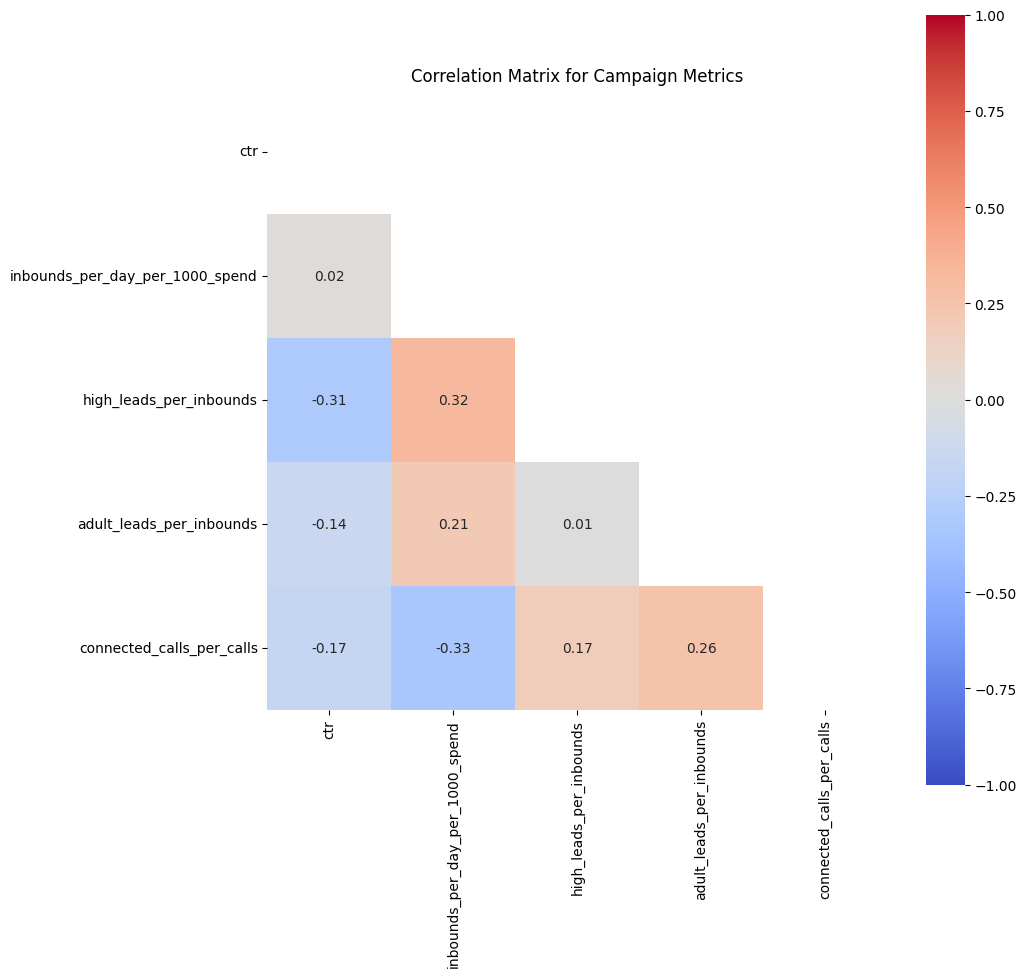

In [124]:
#df_cleaned = df_cleaned.drop(columns=['impressions_per_day_per_spend',])
corrs = df_cleaned.corr()
mask = np.triu(np.ones_like(corrs, dtype = bool))
plt.figure(figsize=(10,10))
sns.heatmap(corrs.where(~mask), annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, cbar=True, fmt=".2f")
plt.title("Correlation Matrix for Campaign Metrics")
plt.show()

In [56]:
df_cleaned.corr()

,ctr,impressions_per_day_per_spend,leads/impressions_perc,inbounds/leads,high_leads/leads,adult_leads/leads,connected_calls/calls
ctr,1.000000,-0.141232,0.761543,-0.607028,-0.125251,-0.100799,-0.170242
impressions_per_day_per_spend,-0.141232,1.000000,-0.255736,0.334909,-0.366043,-0.127403,-0.316625
leads/impressions_perc,0.761543,-0.255736,1.000000,-0.497021,-0.078249,0.218414,0.102261
inbounds/leads,-0.607028,0.334909,-0.497021,1.000000,-0.085131,-0.045245,0.174477
high_leads/leads,-0.125251,-0.366043,-0.078249,-0.085131,1.000000,-0.087959,0.075898
adult_leads/leads,-0.100799,-0.127403,0.218414,-0.045245,-0.087959,1.000000,0.229280
connected_calls/calls,-0.170242,-0.316625,0.102261,0.174477,0.075898,0.229280,1.000000


In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(df):
    vif = pd.DataFrame()
    vif['features'] = pd.Series(df.columns)
    vif['VIF_values'] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
    return vif.sort_values(by='VIF_values').reset_index(drop=True)

compute_vif(df_cleaned)

,features,VIF_values
0,ctr,1.346416
1,impressions_per_day_per_spend,2.097208
2,revenue,2.489940
3,roas,2.966985
4,connected_call_ratio,3.238582
5,adults_ratio,3.866136
6,lead_to_click_ratio,6.964131
7,high_leads_ratio,11.104301
8,inbounds_ratio,15.467313


In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

In [28]:
# Split the data into training and testing sets
#scaler = MinMaxScaler()
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)
y = scaler.fit_transform(roas.values.reshape(-1, 1)).flatten()
# X = df_cleaned
# y = roas .reset_index(drop=True)
# X_train = X 
# y_train = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit the OLS model with training data
model = sm.OLS(y_train, X_train_const).fit()

y_est = model.predict(X_train_const)

mse_train = mean_squared_error(y_train, y_est)

print("\nTrain Data Results:")
print("Mean Squared Error = %.4f"%(mse_train))
print(f"R^2 score = {model.rsquared_adj:.4f}")
print(f"f-Statistic = {model.fvalue:.4f}")
print(f"Overall p-value = {model.f_pvalue:.4f}")

coefficients_df = pd.DataFrame({
    'Variable': model.params.index,
    'Std Coeff': model.params.values,
    'P-Value': model.pvalues.values
})
print("\nVariables by Order of Signifcance are:")
print(coefficients_df.sort_values(by='P-Value'))

y_pred = model.predict(X_test_const)
# Evaluate the performance on the test set
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R^2 score

# Print metrics
print("\nTest Data Results:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")



Train Data Results:
Mean Squared Error = 0.0317
R^2 score = 0.0257
f-Statistic = 4.6643
Overall p-value = 0.0000

Variables by Order of Signifcance are:
                        Variable  Std Coeff   P-Value
0                          const  -0.025076  0.000043
6           connected_call_ratio   0.018552  0.001938
5                   adults_ratio   0.016177  0.006740
3                 inbounds_ratio   0.009768  0.104692
2  impressions_per_day_per_spend   0.007419  0.190024
7            lead_to_click_ratio   0.087261  0.196654
4               high_leads_ratio   0.002980  0.610187
1                            ctr  -0.000153  0.977259

Test Data Results:
Mean Squared Error (MSE): 4.0410
R^2 Score: 0.1675


In [21]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)
y = scaler.fit_transform(roas.values.reshape(-1, 1)).flatten()
# X = df_cleaned
# y = roas
X_train, y_train = X, y
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Assuming df_cleaned is your feature DataFrame and its columns correspond to feature names
feature_names = df_cleaned.columns

# Extract Gini importance
importances = model.feature_importances_

# Combine feature names and importances into a sorted list
importances = pd.DataFrame(sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True),columns = ['Variable', 'Significance (Gini Coeff)'])

# Print feature importances
y_est = model.predict(X_train)

mse_train = mean_squared_error(y_train, y_est)
r2_train = r2_score(y_train,y_est)

print("\nTrain Data Results:")
print("Mean Squared Error = %.4f"%(mse_train))
# print(f"Root Mean Squared Error = {rmse_train:.4f}")
print(f"R^2 score = {r2_train:.4f}")

print("Variable Importances:")
importances
# Predict on the test set
# y_pred = model.predict(X_test)

# # Evaluate the performance on the test set
# mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
# rmse = mse ** 0.5  # Root Mean Squared Error
# r2 = r2_score(y_test, y_pred)  # R^2 score

# # Print metrics
# print("\n Test Data Results:")
# print(f"Mean Squared Error (MSE): {mse:.4f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
# print(f"R^2 Score: {r2:.4f}")




Train Data Results:
Mean Squared Error = 0.0001
R^2 score = 0.8823
Variable Importances:


,Variable,Significance (Gini Coeff)
0,lead_to_click_ratio,0.706463
1,connected_call_ratio,0.116882
2,high_leads_ratio,0.087377
3,impressions_per_day_per_spend,0.035527
4,ctr,0.022552
5,adults_ratio,0.019627
6,inbounds_ratio,0.011571


In [23]:
#scaler = StandardScaler()
#scaler = MinMaxScaler()
# X = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)
# y = scaler.fit_transform(roas.values.reshape(-1, 1)).flatten()
X = df_cleaned
y = roas
X_train, y_train = X, y
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Lasso(alpha=0.07)  # Regularization strength
model.fit(X, y)

# mse_train = mean_squared_error(y_train, y_est)
# r2_train = r2_score(y_train,y_est)

# print("\nTrain Data Results:")
# print("Mean Squared Error = %.4f"%(mse_train))
# # print(f"Root Mean Squared Error = {rmse_train:.4f}")
# print(f"R^2 score = {r2_train:.4f}")

importances = pd.DataFrame(sorted(zip(df_cleaned.columns, model.coef_), key=lambda x: x[1], reverse=True),columns=['Variable','Significance (Lasso Coeff)'])
print("Variables by Importance are:")
importances

Variables by Importance are:


,Variable,Significance (Lasso Coeff)
0,lead_to_click_ratio,71.001201
1,connected_call_ratio,11.223734
2,inbounds_ratio,9.583346
3,ctr,2.898841
4,high_leads_ratio,2.671805
5,impressions_per_day_per_spend,0.109464
6,adults_ratio,-2.366250
